# Object Detection with YOLOv8

## Reference

[1] [[Github](https://github.com/ultralytics/ultralytics)] [[Docs](https://docs.ultralytics.com/ko/)] YOLOv8

[2] [[Github](https://github.com/VictorLin000/YOLOv3_mask_detect?tab=readme-ov-file)] Mask Dataset

## Settings
- Create and activate virtual environment
    - conda create -n yolov8 python==3.10
    - conda activate yolov8

- Install library
    - pip install torch torchvision (버전에 맞게 먼저 설치)
    - pip install ultralytics

In [1]:
# gpu 사용 여부 확인
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# 설치 확인
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.22 🚀 Python-3.10.0 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Setup complete ✅ (28 CPUs, 63.8 GB RAM, 266.6/1862.1 GB disk)


#### 데이터 준비하기
- 데이터 다운로드 [[링크](https://github.com/VictorLin000/YOLOv3_mask_detect?tab=readme-ov-file)]
- 파일 경로

    ```
    yolov8_mask_detection.ipynb              
    └── yolo                       # Dataset 
        └── Mask_1.jpg                       
        └── Mask_1.txt                       
            .                                
            .                                
            .                                

    ```   

In [2]:
import os
import random
import shutil

mask_root = 'yolo/'
mask_path = 'mask_detection/'
label_ = '.txt'
img_ = '.jpg'
file_list = [file for file in os.listdir(mask_root) if file.endswith(".txt")]

# 저장 경로 만들기
folder_list = ['mask_detection', 'mask_detection/train', 'mask_detection/val', 'mask_detection/train/images', \
                'mask_detection/train/labels', 'mask_detection/val/images', 'mask_detection/val/labels']
for folder in folder_list:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
random.shuffle(file_list)
test_ratio = 0.1
test_list = file_list[:int(len(file_list)*test_ratio)]
train_list = file_list[int(len(file_list)*test_ratio):]

for i in test_list:
    f_name = os.path.splitext(i)[0]
    shutil.copyfile(os.path.join(mask_root,(f_name+img_)), os.path.join(mask_path, 'val/images', (f_name+img_)))
    shutil.copyfile(os.path.join(mask_root,(f_name+label_)), os.path.join(mask_path, 'val/labels', (f_name+label_)))
for i in train_list:
    f_name = os.path.splitext(i)[0]
    shutil.copyfile(os.path.join(mask_root,(f_name+img_)), os.path.join(mask_path, 'train/images', (f_name+img_)))
    shutil.copyfile(os.path.join(mask_root, (f_name+label_)), os.path.join(mask_path, 'train/labels', (f_name+label_)))

print(f"train 개수: {len(train_list)}\ntest개수: {len(test_list)}")

train 개수: 611
test개수: 67


#### Config file 만들기
- 절대 경로로 설정하기
- data['train'] = 'open_source/object_detection/mask_detection/train'
- data['val'] = 'open_source/object_detection/mask_detection/val'
- data['test'] = 'open_source/object_detection/mask_detection/val'

In [4]:
import yaml
data =dict()

data['train'] = 
data['val'] = 
data['test'] = 

data['nc'] = 3
data['names'] =['OK','improperly', 'NO']

with open('mask_detection.yaml', 'w') as f:
	yaml.dump(data, f)

#### 모델 훈련하기

In [5]:
from ultralytics import YOLO
model = YOLO('yolov8s.yaml')
results = model.train(data ='mask_detection.yaml', 
                      epochs = 100, 
                      batch=32, 
                      device = 0, 
                      patience=30, 
                      name='project1')

New https://pypi.org/project/ultralytics/8.1.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.22 🚀 Python-3.10.0 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=mask_detection.yaml, epochs=100, time=None, patience=30, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=project1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\train\labels... 678 images, 0 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<00:00, 3108.59it/s]

train: WARNING ⚠️ C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\train\images\Mask_162.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\train\images\Mask_3.jpg: corrupt JPEG restored and saved
train: New cache created: C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\train\labels.cache



val: Scanning C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\val\labels... 278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 278/278 [00:00<00:00, 2138.97it/s]

val: WARNING ⚠️ C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\val\images\Mask_388.jpg: corrupt JPEG restored and saved
val: New cache created: C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\val\labels.cache


Plotting labels to runs\detect\project1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\project1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.95G      4.365      4.695      4.168         56        640: 100%|██████████| 22/22 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]

                   all        278       1798   0.000118    0.00322   5.93e-05   9.74e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.98G      3.384      3.579      3.705         45        640: 100%|██████████| 22/22 [00:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        278       1798      7e-05   0.000715   3.53e-05   7.03e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.03G      2.513      2.573      2.764         98        640: 100%|██████████| 22/22 [00:05<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        278       1798   0.000115    0.00119    5.8e-05   1.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.48G      2.173      2.071      2.199         32        640: 100%|██████████| 22/22 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]

                   all        278       1798   0.000628     0.0306   0.000523   0.000221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.57G      1.965      1.751      1.888         45        640: 100%|██████████| 22/22 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        278       1798      0.949      0.041      0.076     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.73G      1.831      1.498      1.658         57        640: 100%|██████████| 22/22 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        278       1798      0.645      0.227      0.248      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.95G      1.726      1.389      1.549         83        640: 100%|██████████| 22/22 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]

                   all        278       1798      0.714      0.306      0.362      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.05G       1.63      1.279      1.456         61        640: 100%|██████████| 22/22 [00:05<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        278       1798      0.745      0.378      0.434      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.81G      1.607      1.208       1.45         46        640: 100%|██████████| 22/22 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

                   all        278       1798      0.564      0.399      0.442      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.78G      1.546      1.128       1.38         43        640: 100%|██████████| 22/22 [00:05<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all        278       1798      0.841       0.35      0.477       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.92G      1.481       1.09      1.349         66        640: 100%|██████████| 22/22 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        278       1798      0.686      0.468      0.528      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       8.1G      1.457      1.043      1.354         61        640: 100%|██████████| 22/22 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        278       1798      0.694      0.503      0.567      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.24G      1.424      1.022      1.301         92        640: 100%|██████████| 22/22 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        278       1798      0.644      0.504      0.571      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.44G      1.385     0.9675      1.293         38        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        278       1798      0.747      0.514      0.605      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.95G      1.389     0.9576       1.29         41        640: 100%|██████████| 22/22 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        278       1798      0.628      0.529      0.579      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.07G      1.372     0.9455      1.272         42        640: 100%|██████████| 22/22 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        278       1798       0.84      0.469      0.623      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.58G      1.331     0.9266      1.254         34        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        278       1798      0.693       0.59      0.647      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.98G       1.35     0.8927      1.243         40        640: 100%|██████████| 22/22 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        278       1798      0.807      0.569      0.683      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.56G      1.298     0.8567      1.227         54        640: 100%|██████████| 22/22 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        278       1798      0.756      0.594      0.686      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       8.1G      1.292     0.8546      1.214         57        640: 100%|██████████| 22/22 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        278       1798      0.812       0.55      0.675      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.98G      1.256     0.8459        1.2         57        640: 100%|██████████| 22/22 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        278       1798      0.788      0.642      0.711      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.94G      1.254     0.8465      1.208         83        640: 100%|██████████| 22/22 [00:04<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        278       1798      0.791      0.613      0.721      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.46G      1.288     0.8334       1.21         69        640: 100%|██████████| 22/22 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        278       1798       0.84      0.641      0.739      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.97G      1.237     0.8143      1.211         25        640: 100%|██████████| 22/22 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        278       1798      0.765      0.641      0.696      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.11G      1.244     0.8316      1.214         61        640: 100%|██████████| 22/22 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all        278       1798      0.777      0.634      0.712      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.02G      1.247     0.8106      1.202         46        640: 100%|██████████| 22/22 [00:04<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        278       1798      0.793       0.66      0.737       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.95G      1.211     0.7834      1.182         44        640: 100%|██████████| 22/22 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        278       1798      0.757        0.7       0.76      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.71G      1.219      0.781      1.186         49        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        278       1798      0.791      0.681      0.757      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.85G      1.216     0.8024      1.203         30        640: 100%|██████████| 22/22 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all        278       1798      0.786      0.672      0.749      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.86G      1.199     0.7632      1.172         55        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        278       1798      0.814      0.699      0.771      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.47G      1.181     0.7451      1.165         57        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        278       1798      0.867      0.682       0.81      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.47G       1.18     0.7409       1.16         59        640: 100%|██████████| 22/22 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        278       1798      0.828      0.736      0.795      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.05G      1.149     0.7337      1.161         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]

                   all        278       1798      0.817      0.698      0.769      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.93G      1.151      0.713      1.136         72        640: 100%|██████████| 22/22 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        278       1798      0.869      0.705      0.795      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.88G      1.174     0.7155      1.152         72        640: 100%|██████████| 22/22 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        278       1798      0.835      0.695      0.788      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         8G       1.17     0.7256      1.149         33        640: 100%|██████████| 22/22 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        278       1798      0.827      0.713      0.806      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         8G       1.15     0.6908      1.118         47        640: 100%|██████████| 22/22 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all        278       1798      0.851      0.707      0.811      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.35G      1.151     0.7021      1.127         69        640: 100%|██████████| 22/22 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]

                   all        278       1798      0.881      0.725      0.822       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.85G      1.139     0.6778      1.128         38        640: 100%|██████████| 22/22 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        278       1798      0.838      0.733      0.807      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.73G      1.128     0.6913      1.138         80        640: 100%|██████████| 22/22 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        278       1798      0.819       0.73      0.803       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.85G      1.116     0.6764      1.113         58        640: 100%|██████████| 22/22 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]

                   all        278       1798      0.836      0.726      0.827       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.76G       1.13      0.677       1.11         75        640: 100%|██████████| 22/22 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        278       1798      0.905      0.729      0.833      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.03G       1.13     0.6644      1.113         78        640: 100%|██████████| 22/22 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        278       1798      0.837      0.762      0.845      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.91G      1.098     0.6542      1.106        105        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        278       1798       0.89      0.745      0.847      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.27G      1.092     0.6584      1.107         38        640: 100%|██████████| 22/22 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        278       1798      0.878       0.75      0.841      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.04G      1.105     0.6576      1.104         84        640: 100%|██████████| 22/22 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        278       1798      0.856      0.758      0.836      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.68G      1.105     0.6676       1.12         44        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        278       1798      0.878      0.768      0.854      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.98G      1.077     0.6454      1.088         59        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        278       1798      0.899      0.752      0.846      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.03G      1.085     0.6431        1.1         59        640: 100%|██████████| 22/22 [00:04<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]

                   all        278       1798       0.92      0.727      0.858      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.46G      1.057     0.6387      1.078         97        640: 100%|██████████| 22/22 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        278       1798      0.917      0.724      0.848      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.81G      1.045      0.616       1.09         62        640: 100%|██████████| 22/22 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        278       1798      0.919      0.766      0.865      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.63G      1.071     0.6304      1.095         50        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        278       1798      0.889      0.744      0.866      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.58G      1.061     0.6274      1.071         98        640: 100%|██████████| 22/22 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all        278       1798      0.853      0.767      0.857      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.49G      1.058     0.6173       1.09         70        640: 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        278       1798      0.885      0.757      0.853       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.94G      1.062     0.6168      1.074         75        640: 100%|██████████| 22/22 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all        278       1798       0.87      0.802      0.873      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.51G      1.037     0.5957      1.076         42        640: 100%|██████████| 22/22 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        278       1798      0.889      0.789      0.875      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.88G      1.038     0.6082      1.095         48        640: 100%|██████████| 22/22 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

                   all        278       1798      0.915      0.793       0.89      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.99G      1.019      0.599      1.087         48        640: 100%|██████████| 22/22 [00:04<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        278       1798      0.918      0.805       0.89      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.28G      1.057     0.5941      1.081         52        640: 100%|██████████| 22/22 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        278       1798        0.9      0.792      0.888      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.78G      1.016     0.5853      1.066         43        640: 100%|██████████| 22/22 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        278       1798      0.954      0.767      0.888      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.17G      1.044     0.5885      1.067        104        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  5.00it/s]

                   all        278       1798      0.891      0.814      0.897      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.48G      1.016     0.5726      1.078         52        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all        278       1798      0.906      0.805      0.886      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.47G      1.025     0.5778      1.063         39        640: 100%|██████████| 22/22 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        278       1798      0.918      0.819      0.901      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.31G      1.018     0.5721      1.061         57        640: 100%|██████████| 22/22 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        278       1798      0.895      0.831      0.901      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.95G     0.9981     0.5621       1.06         85        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        278       1798      0.916      0.841      0.904      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.04G     0.9918     0.5705      1.054         74        640: 100%|██████████| 22/22 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        278       1798      0.914      0.821      0.903      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.52G      1.017     0.5721      1.057         56        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        278       1798      0.906      0.819        0.9      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.31G     0.9963     0.5553      1.048         39        640: 100%|██████████| 22/22 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        278       1798      0.901      0.825      0.908      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.97G      1.013       0.57      1.057         58        640: 100%|██████████| 22/22 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  5.00it/s]

                   all        278       1798      0.944      0.819      0.911      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.49G     0.9875     0.5498      1.046         65        640: 100%|██████████| 22/22 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        278       1798      0.921      0.824      0.915      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.48G     0.9853     0.5581       1.05         75        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        278       1798      0.921      0.836      0.916      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.24G     0.9788     0.5539       1.04         50        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        278       1798       0.93      0.827      0.911      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.14G     0.9564     0.5474      1.037         80        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        278       1798      0.907      0.861      0.928      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.49G     0.9553     0.5336      1.043         25        640: 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        278       1798      0.922      0.822      0.902      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.97G     0.9626     0.5392      1.037         62        640: 100%|██████████| 22/22 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        278       1798      0.944      0.858      0.929       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.97G     0.9539     0.5235      1.025        116        640: 100%|██████████| 22/22 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        278       1798      0.925      0.844      0.928      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.25G     0.9705      0.538      1.028         47        640: 100%|██████████| 22/22 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        278       1798      0.927      0.848      0.928      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.91G     0.9642     0.5363      1.045         37        640: 100%|██████████| 22/22 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        278       1798       0.94      0.863      0.934      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.47G     0.9347     0.5265      1.023        128        640: 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]

                   all        278       1798       0.94      0.851      0.937      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.84G     0.9612     0.5274      1.033         74        640: 100%|██████████| 22/22 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        278       1798      0.945      0.848      0.941      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.02G     0.9495     0.5224      1.032         52        640: 100%|██████████| 22/22 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  5.00it/s]

                   all        278       1798      0.947       0.84       0.93      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.92G     0.9281     0.5184      1.034         16        640: 100%|██████████| 22/22 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        278       1798      0.953      0.856      0.938      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.48G     0.9276     0.5081      1.026         41        640: 100%|██████████| 22/22 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

                   all        278       1798      0.916      0.883      0.943      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       8.1G     0.9272     0.5029      1.023         45        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        278       1798      0.947      0.854      0.937        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.14G      0.932     0.5042      1.013         65        640: 100%|██████████| 22/22 [00:05<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        278       1798      0.957      0.844      0.941      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.18G     0.9547     0.5087      1.021         46        640: 100%|██████████| 22/22 [00:05<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all        278       1798      0.932      0.886      0.948      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.35G     0.9256     0.5074      1.007         58        640: 100%|██████████| 22/22 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        278       1798      0.945      0.875      0.946      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.05G     0.9398      0.506      1.012        100        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        278       1798       0.96      0.871      0.951      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.18G     0.9292     0.5007      1.013         97        640: 100%|██████████| 22/22 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        278       1798      0.935      0.888      0.951      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.14G     0.9067     0.4905       1.01         51        640: 100%|██████████| 22/22 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        278       1798      0.968      0.861       0.95      0.716


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.46G      0.902     0.4939      1.018         55        640: 100%|██████████| 22/22 [00:05<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        278       1798      0.943      0.877      0.944      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.95G      0.884      0.471      1.012         53        640: 100%|██████████| 22/22 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        278       1798      0.947      0.861      0.948      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.18G     0.8868     0.4562      1.013         42        640: 100%|██████████| 22/22 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]

                   all        278       1798      0.961      0.849      0.948       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.85G     0.8738     0.4513      1.001         50        640: 100%|██████████| 22/22 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        278       1798      0.932      0.882      0.954      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.76G     0.8704      0.455      1.007         39        640: 100%|██████████| 22/22 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        278       1798      0.968      0.881      0.955      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.93G     0.8606     0.4444      0.988         26        640: 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        278       1798      0.937      0.899      0.957       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.94G     0.8711     0.4499     0.9973         43        640: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

                   all        278       1798      0.939      0.893      0.959      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.95G     0.8633      0.444     0.9991         57        640: 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

                   all        278       1798      0.939      0.892      0.957      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.75G     0.8628     0.4422      1.003         19        640: 100%|██████████| 22/22 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all        278       1798      0.939      0.899       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.84G     0.8454      0.439          1         27        640: 100%|██████████| 22/22 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        278       1798      0.943      0.901      0.959       0.73



100 epochs completed in 0.179 hours.
Optimizer stripped from runs\detect\project1\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\project1\weights\best.pt, 22.5MB

Validating runs\detect\project1\weights\best.pt...
Ultralytics YOLOv8.1.22 🚀 Python-3.10.0 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]


                   all        278       1798      0.939      0.899       0.96      0.733
                    OK        278       1398      0.959      0.931      0.971       0.76
            improperly        278         72      0.956      0.889      0.969      0.756
                    NO        278        328      0.903      0.876       0.94      0.681
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\project1


#### 모델 테스트하기

In [6]:
from ultralytics import YOLO

# Load a model
model_path = 'runs/detect/project1/weights/best.pt'
model = YOLO(model_path)  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

print("map50-95", metrics.box.map)
print("map50", metrics.box.map50)

Ultralytics YOLOv8.1.22 🚀 Python-3.10.0 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)


YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\val\labels.cache... 278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 278/278 [00:00<?, ?it/s]

val: WARNING ⚠️ C:\Users\jyes9\Desktop\PROJECT\github\open_source\object_detection\mask_detection\val\images\Mask_388.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.30it/s]


                   all        278       1798      0.955      0.884       0.96      0.732
                    OK        278       1398      0.971      0.918      0.971      0.762
            improperly        278         72      0.967      0.889       0.97      0.752
                    NO        278        328      0.928      0.845      0.939      0.683
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val2
map50-95 0.7319281918371069
map50 0.9596486376617602


#### 추론하기

In [7]:
from ultralytics import YOLO
import cv2
import os
from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import numpy as np

model_path = 'runs/detect/project1/weights/best.pt'
model = YOLO(model_path)

root_folder = 'mask_detection/val/images'
result_folder = 'mask_detection/result'
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

test_img_list = os.listdir(root_folder)
device = 'cpu'
color_dict = [(0, 255, 0), (255, 0, 0), (0, 0, 255)]


0: 640x448 1 OK, 1 improperly, 1 NO, 80.7ms
Speed: 4.0ms preprocess, 80.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


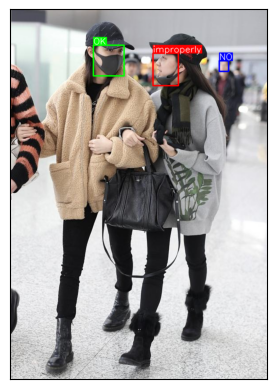

In [24]:
test_img = cv2.imread(os.path.join(root_folder, test_img_list[5]))
img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
results = model(test_img)
for result in results:
    annotator = Annotator(img_src)
    boxes = result.boxes
    for box in boxes:
        b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
        cls = box.cls
        annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)])
img_src = annotator.result()

%matplotlib inline
plt.imshow(img_src)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.show()

In [25]:
for idx , file in enumerate(test_img_list):
    test_img = cv2.imread(os.path.join(root_folder, file))
    img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    results = model(test_img)

    for result in results:
        annotator = Annotator(img_src)
        boxes = result.boxes
        for box in boxes:
            b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
            cls = box.cls
            annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)])
    img_src = annotator.result()
    cv2.imwrite(os.path.join(result_folder, file), cv2.cvtColor(img_src, cv2.COLOR_RGB2BGR))  


0: 384x640 8 OKs, 233.3ms
Speed: 2.0ms preprocess, 233.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 640x640 1 OK, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 1 OK, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)

0: 480x640 1 OK, 1 NO, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 640x480 1 OK, 1 improperly, 1 NO, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x448 1 OK, 1 improperly, 1 NO, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 OK, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)

0: 384x640 6 OKs, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3